In [30]:
from collections import Counter
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import json

#Connect to Database
conn = sqlite3.connect('iotaDB.db')
cursor = conn.cursor()


Number of Transactions by Month

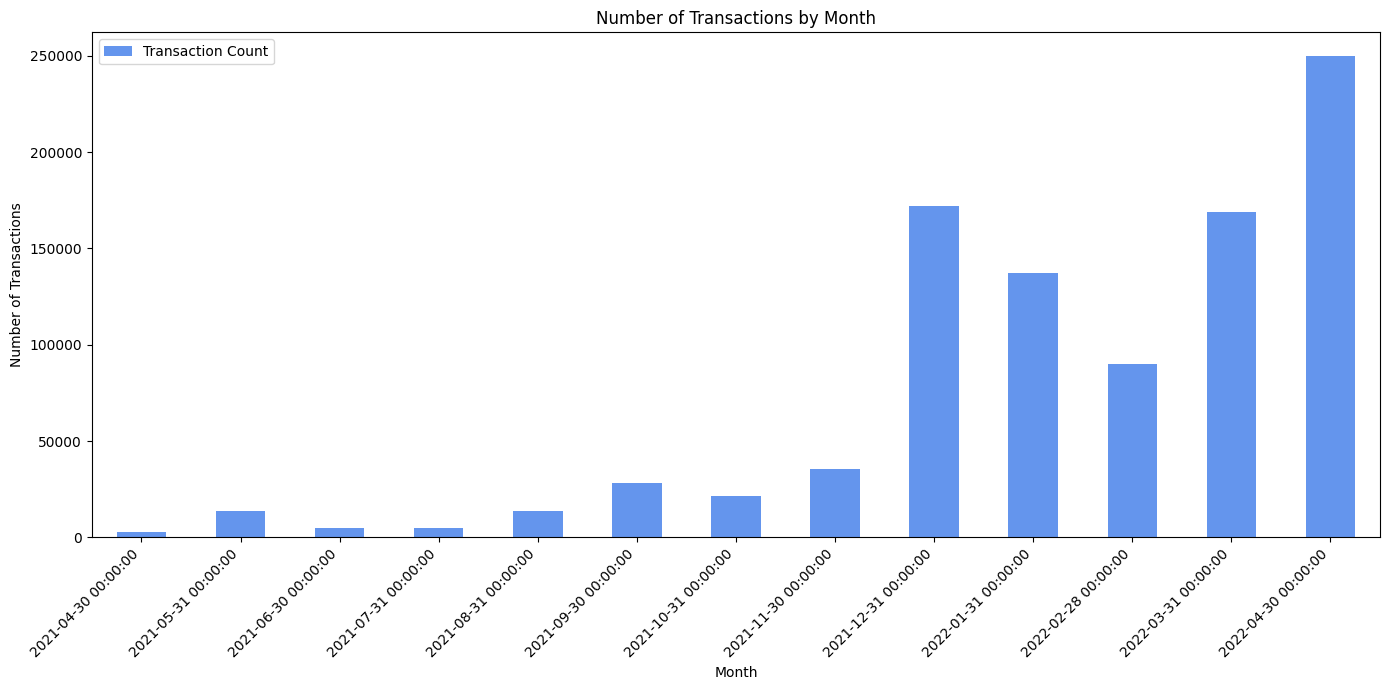

In [31]:

query = """
SELECT timestamp, COUNT (*) as transaction_count
FROM Transactions
GROUP BY timestamp
ORDER BY timestamp

"""
cursor.execute(query)
data = cursor.fetchall()



df = pd.DataFrame(data,columns= ['Timestamp', 'Transaction Count'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_resampled = df.set_index('Timestamp').resample('ME').sum()

# Plotting the results
plt.figure(figsize=(14, 7))
df_resampled.plot(kind='bar', color='cornflowerblue', ax=plt.gca())
plt.title('Number of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

Number of Transactions by Year

C:\Users\sinth\AppData\Local\Temp\ipykernel_16840\3121810584.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_resampled = df.set_index('Timestamp').resample('Y').sum()


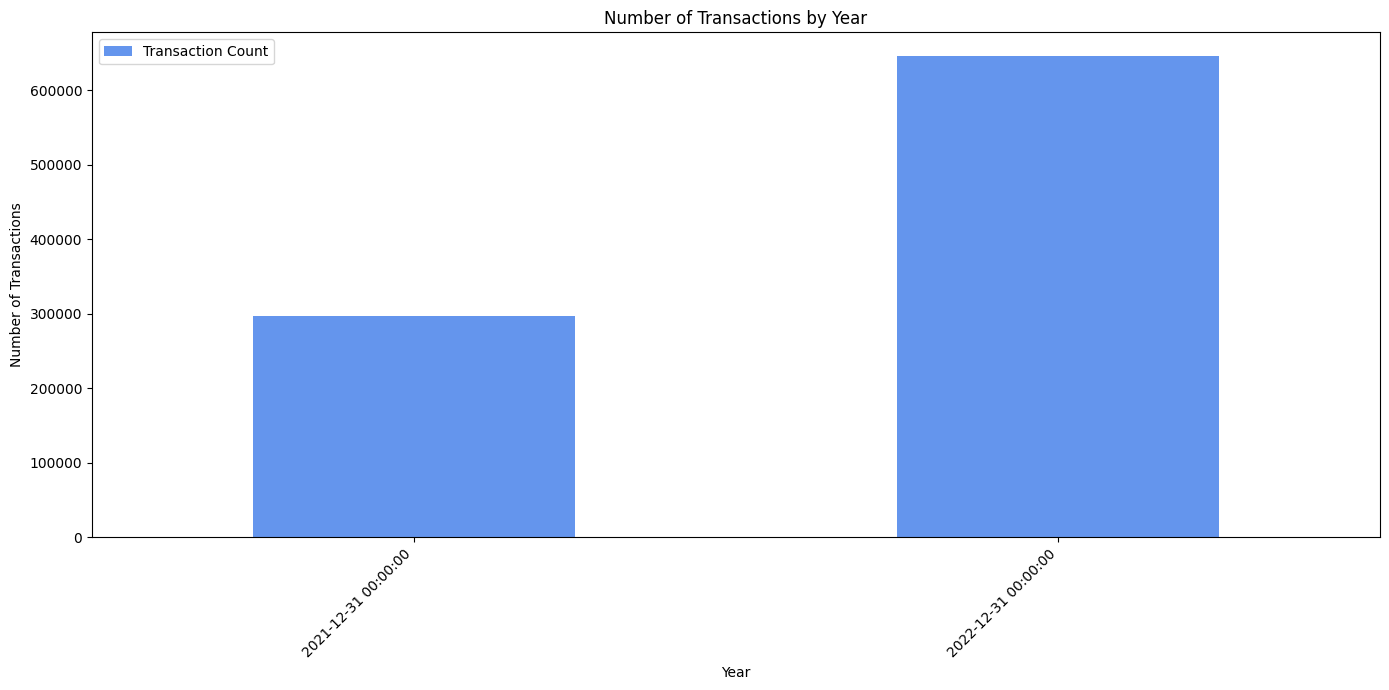

In [35]:
query = """
SELECT timestamp, COUNT (*) as transaction_count
FROM Transactions
GROUP BY timestamp
ORDER BY timestamp

"""
cursor.execute(query)
data = cursor.fetchall()




df = pd.DataFrame(data,columns= ['Timestamp', 'Transaction Count'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_resampled = df.set_index('Timestamp').resample('Y').sum()

# Plotting the results
plt.figure(figsize=(14, 7))
df_resampled.plot(kind='bar', color='cornflowerblue', ax=plt.gca())
plt.title('Number of Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

Identify the address involved in the most transactions

In [34]:
# Query the database to get all input and output addresses
query = """
SELECT input_addresses_x, output_addresses_y FROM Transactions
"""
cursor.execute(query)
rows = cursor.fetchall()


# Initialize a counter to tally occurrences of each address
address_counter = Counter()


# Process each row to extract addresses and count their occurrences
for input_addresses_x, output_addresses_y in rows:
    # Load the JSON data for input and output addresses
    input_addresses = json.loads(input_addresses_x)
    output_addresses = json.loads(output_addresses_y)
    
    # Update the counter for each address in the inputs and outputs
    address_counter.update(input_addresses)
    address_counter.update(output_addresses)

# Find the address with the most transactions
most_common_address, most_transactions = address_counter.most_common(1)[0]


print(f"The address with the most transactions is {most_common_address} with {most_transactions} transactions.")


The address with the most transactions is b1cd46b98ec8501da1a85aa9ce9c9a52e17e672b6b18112a04174612451a7359 with 128835 transactions.


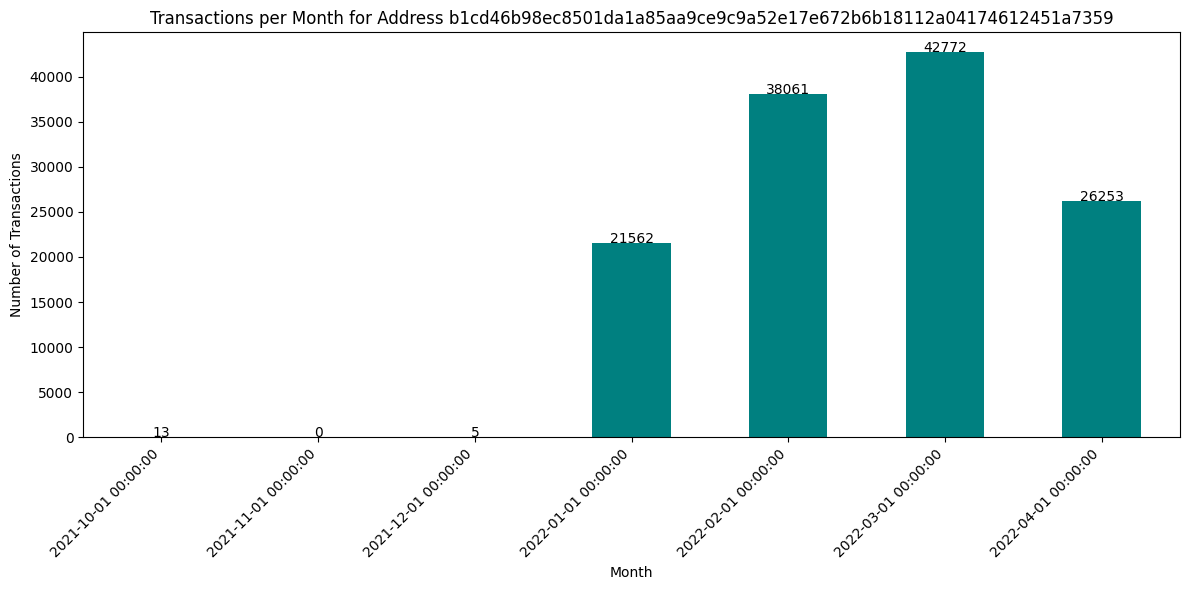

In [33]:
import sqlite3
import json
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('iotaDB.db')
cursor = conn.cursor()

# Specify the address you want to analyze
specific_address = most_common_address

# Query the database to get timestamps for transactions involving the specific address
query = """
SELECT timestamp, input_addresses_x, output_addresses_y
FROM Transactions
"""
cursor.execute(query)
rows = cursor.fetchall()

# Close the database connection


# Create a DataFrame to store transaction timestamps
transactions = {'Timestamp': [], 'Count': []}

# Check each transaction to see if the specific address is part of the inputs or outputs
for timestamp, input_addresses_x, output_addresses_y in rows:
    input_addresses = json.loads(input_addresses_x)
    output_addresses = json.loads(output_addresses_y)
    # Count the transaction if the specific address is in inputs or outputs
    if specific_address in input_addresses or specific_address in output_addresses:
        transactions['Timestamp'].append(timestamp)
        transactions['Count'].append(1)  # Each row represents one transaction

# Convert the dictionary to a DataFrame
df = pd.DataFrame(transactions)

# Check if DataFrame is empty
if df.empty:
    print("No transactions found for the specified address.")
else:
    # Convert timestamp to datetime type
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Resample data by month, summing transaction counts for each month
    df_resampled = df.set_index('Timestamp').resample('MS').sum()  # 'MS' stands for month start

    # Plotting the results
    plt.figure(figsize=(12, 6))
    bars = df_resampled['Count'].plot(kind='bar', color='teal')
    plt.title(f'Transactions per Month for Address {specific_address}')
    plt.xlabel('Month')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45, ha='right')  # Rotate date labels for better readability
    plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

    # Adding text labels above the bars
    for i, value in enumerate(df_resampled['Count']):
        plt.text(i, value + 0.5, str(value), ha='center')

    # Show the plot
    plt.show()
